In [1]:
from tank_kills_v2 import TankKills
import random
from pynput.keyboard import Controller,Key
import time
import pygame
import matplotlib.pyplot as plt
import numpy as np
import json

pygame 2.2.0 (SDL 2.0.22, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
ins = [
    Key.up,
    Key.right,
    Key.down,
    Key.left
    ]

In [3]:
keyboard = Controller()

In [4]:
q_table = np.zeros((600*600,4))
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
q_table[300*400]

array([0., 0., 0., 0.])

In [12]:
num_episodes = 50
# max_steps_per_episode = 5
learning_rate = 0.1 # alpha
discount_factor = 0.90 # gamma

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.007

In [13]:
rewards_all_episodes = []
all_actions_taken = []
no_of_actions_each_episode = []
for episode in range(num_episodes):
    print(f"-------Game: {episode}/{num_episodes}-------")
    env = TankKills(600,600)
    running = True
    reward_current_episode = 0
    state = 300*400
    time.sleep(0.4)
    reward = 0
    action_taken_in_episode = 0
    while running:
        reward = 0
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = random.randint(0,3)
        all_actions_taken.append(action)
        action_taken_in_episode += 1
        running,reward,score,pp,ep = env.play()
        keyboard.press(ins[action])
        keyboard.release(ins[action])
        new_state = int(pp[0])*int(pp[1])
        q_table[state,action] = q_table[state,action] * (1-learning_rate) + learning_rate*(reward+discount_factor*np.max(q_table[new_state,:]))
        state = new_state
        reward_current_episode += reward
        if not running:
            pygame.display.quit()
            break
        
        exploration_rate = min_exploration_rate+(max_exploration_rate-min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
    
    rewards_all_episodes.append(reward_current_episode)
    no_of_actions_each_episode.append(action_taken_in_episode)
    print(f"-- Score: {score}")
    print(f"-- Total Actions Taken: {action_taken_in_episode}")
    pygame.display.quit()

-------Game: 0/50-------
-- Score: 0
-- Total Actions Taken: 2086
-------Game: 1/50-------
-- Score: 1
-- Total Actions Taken: 3987
-------Game: 2/50-------
-- Score: 0
-- Total Actions Taken: 2061
-------Game: 3/50-------
-- Score: 0
-- Total Actions Taken: 2041
-------Game: 4/50-------
-- Score: 0
-- Total Actions Taken: 2071
-------Game: 5/50-------
-- Score: 1
-- Total Actions Taken: 4010
-------Game: 6/50-------
-- Score: 0
-- Total Actions Taken: 2011
-------Game: 7/50-------
-- Score: 1
-- Total Actions Taken: 4049
-------Game: 8/50-------
-- Score: 0
-- Total Actions Taken: 2096
-------Game: 9/50-------
-- Score: 0
-- Total Actions Taken: 2041
-------Game: 10/50-------
-- Score: 1
-- Total Actions Taken: 3772
-------Game: 11/50-------
-- Score: 0
-- Total Actions Taken: 2071
-------Game: 12/50-------
-- Score: 2
-- Total Actions Taken: 5816
-------Game: 13/50-------
-- Score: 0
-- Total Actions Taken: 2081
-------Game: 14/50-------
-- Score: 0
-- Total Actions Taken: 2021
-----

In [14]:
data = {}
data['q_table'] = q_table.tolist()
with open('q_table_1.json','w') as f:
    json.dump(data,f)


### Q Table values of spawn location

In [16]:
print(q_table[300*400])

[0.00382784 0.00446895 0.00601674 0.00592969]


### Rewards per game

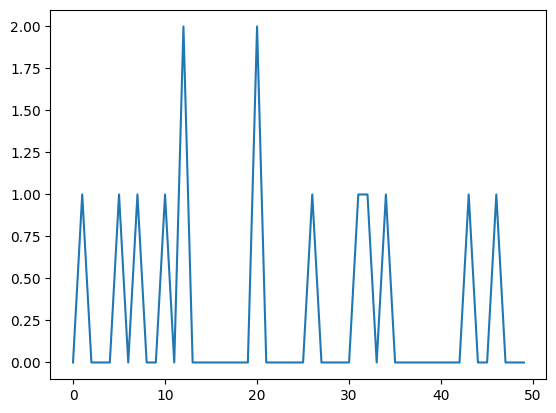

In [22]:
plt.plot(rewards_all_episodes)
plt.show()

### Number of actions each game

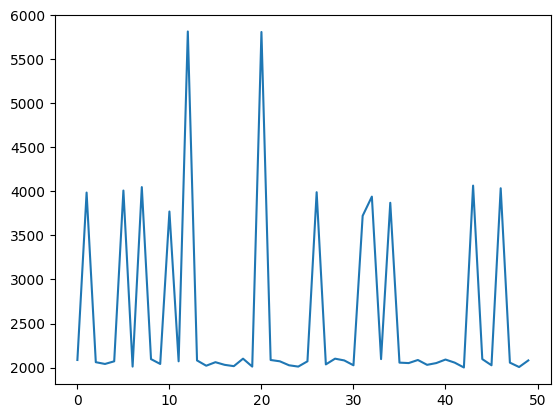

In [23]:
plt.plot(no_of_actions_each_episode)
plt.show()

### Distribution of all actions

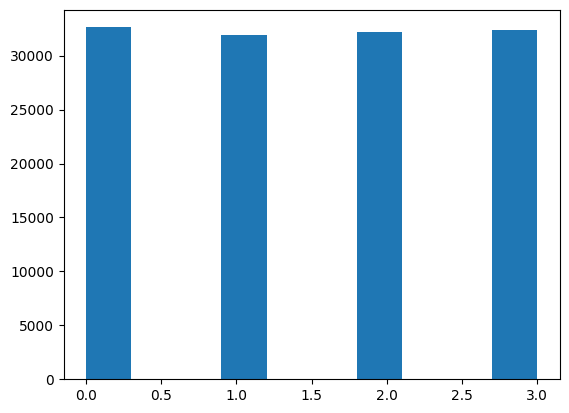

In [18]:
plt.hist(all_actions_taken)
plt.show()